# Предобработка

In [1]:
import os 
paths = os.listdir("USA 2000-2009")
paths.remove("USA 2000Q1.xlsx")

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
df = pd.read_excel("USA 2000-2009/USA 2000Q1.xlsx")
for path in tqdm(paths):
    full_path = "USA 2000-2009/" + path
    temp_df = pd.read_excel(full_path)
    df = pd.concat([df, temp_df], ignore_index= True)

  0%|          | 0/41 [00:00<?, ?it/s]

In [3]:
paths2 = os.listdir("USA 2010-2018")
for path in tqdm(paths2):
    full_path = "USA 2010-2018/" + path
    temp_df = pd.read_excel(full_path)
    df = pd.concat([df, temp_df], ignore_index= True)

  0%|          | 0/33 [00:00<?, ?it/s]

In [4]:
paths3 = os.listdir("Updated Bloomberg ratings")
for path in tqdm(paths3):
    excel_paths = os.listdir("Updated Bloomberg ratings/" + path)
    for xlsx_path in excel_paths:
        full_path = "Updated Bloomberg ratings/" + path + "/" + xlsx_path
        temp_df = pd.read_excel(full_path)
        df = pd.concat([df, temp_df], ignore_index= True)

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
df

,Company Name,Date,Rating Type,Agency,Curr Rtg,Last Rtg,Ctry,Industry Type,Security Name
0,Niagara Mohawk Power Corp,01/01/2000,Short Term,Moody's,WR,P-3,US,Integrated Utilities,15137Z US Equity
1,Meditrust Exercisable Put Options Securities T...,01/01/2000,Senior Unsecured Debt,Moody's,Ba2 *-,Ba2,US,Health Care REIT,12960Z US Equity
2,Verizon Communications Inc,01/01/2000,Senior Unsecured Debt,Moody's,WR,A1 *-,US,Wireless Telecommunications Services,VZ US Equity
3,American Eagle Insurance Co,01/01/2000,Financial Strength,Fitch,A+,NaN,US,NaN,9246Z US Equity
4,Wright Medical Technology Inc,01/02/2000,Senior Secured Debt,Moody's,WR,Caa3,US,Surgical Appliances & Supplies Manufacturing,5775Z US Equity
...,...,...,...,...,...,...,...,...,...
289258,NVIDIA Corp,01/04/2021,ST Issuer Default Rating,Fitch,WD,F1,US,Application Specific Multimedia,NVDA US Equity
289259,NVIDIA Corp,01/04/2021,Senior Unsecured Debt,Fitch,WD,A,US,Application Specific Multimedia,NVDA US Equity
289260,Peach State Health Plan Inc,01/04/2021,Long Term Rating,Moody's,Baa1,NaN,US,Life Insurance,4097510Z US Equity
289261,Superior HealthPlan Inc,01/04/2021,Long Term Rating,Moody's,Baa1,NaN,US,Managed Care,4100582Z US Equity


In [6]:
len(df["Agency"].unique())

3

<AxesSubplot:>

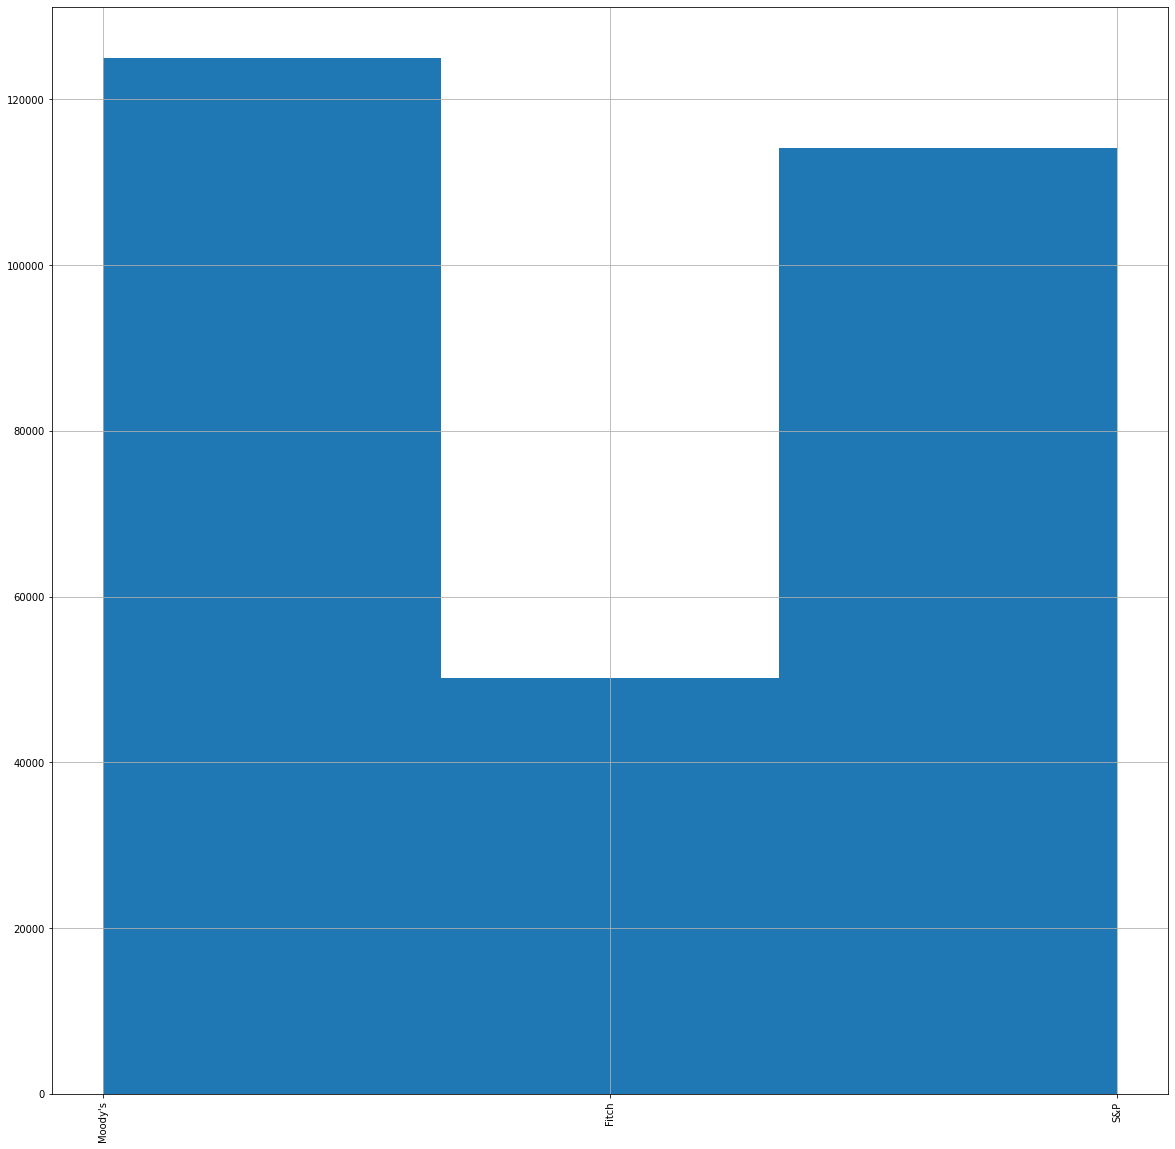

In [7]:
df["Agency"].hist(xrot = 90, bins = 3, figsize = (20, 20))

In [8]:
df.groupby("Rating Type").count()

,Company Name,Date,Agency,Curr Rtg,Last Rtg,Ctry,Industry Type,Security Name
Rating Type,,,,,,,,
Adj Baseline Credit Assessment,403,403,403,403,288,403,402,403
Asset Backed Short Term,1427,1427,1427,1427,913,1427,1422,1427
Bank Financial Strength,1303,1303,1303,1303,1206,1303,1282,1303
Baseline Credit Assessment,792,792,792,792,722,792,791,792
Bond Fund,4,4,4,4,0,4,0,4
...,...,...,...,...,...,...,...,...
Spec Grade Liquidity Rtg,5589,5589,5589,5589,3804,5589,5575,5589
Sr Senior Unsecured Debt,10,10,10,10,5,10,10,10
Subordinated Debt,5572,5572,5572,5572,5081,5572,5566,5572


In [9]:
df[df["Rating Type"] == "LT Local Issuer Credit"]["Curr Rtg"].unique()

array(['BBB+', 'BB+', 'CC * ', 'BBB', 'BB-', 'A', 'BBBpi', 'BB', 'Api',
       'BBpi', 'Bpi', 'D', 'CCC+', 'R', 'B', 'BB+ *-', 'NR', 'B+ *-',
       'AA+', 'AA', 'A *-', 'AA-', 'B+', 'A+ *-', 'BBB+ * ', 'CC *-',
       'BB *+', 'BB+ *+', 'BBB *+', 'B-', 'A+', 'BBB+ *-', 'BB- * ',
       'B- *+', 'AA- *-', 'CCC+ *+', 'AA *-', 'A *+', 'A- *+', 'A- *-',
       'A-', 'AA- *+', 'BB- *-', 'BBB- * ', 'CCC', 'CCC * ', 'BBB-',
       'BB+ * ', 'A+ *+', 'A- * ', 'B *-', 'B+ *+', 'BB * ', 'CCC *-',
       'BBB- *-', 'BBB+ *+', 'SD', 'CCC+ *-', 'AAAt', 'CC', 'BB *-',
       'CCC- *-', 'B- *-', 'B+ * ', 'AApi', 'BB- *+', 'B *+', 'BBB *-',
       'B * ', 'AA * ', 'A * ', 'A+ * ', 'BBB- *+', 'AAA', 'AA- * ',
       'AA *+', 'CCC-', 'CCC *+', 'BBB * ', 'AA+ *-', 'CC *+', 'B- * ',
       'AAA *-', 'CCCpi', 'BBB-pi', 'AA-pi', 'C *-', 'CCC+ * ', 'CCC- *+',
       'AA+ *+', 'BBB+pi', 'CCC- * ', 'A+pi', 'A-pi', 'D *-', 'D *+',
       'Bu', 'Bu *-', 'BBu', 'Bu * ', 'BBB+u', 'B-u', 'BB+pi', 'AAu',
       'AA

In [10]:
df.loc[:, "Date"] = pd.to_datetime(df.loc[:, "Date"], format = "%m/%d/%Y")

In [11]:
s_and_p = df[df["Agency"] == "S&P"]

In [12]:
s_and_p = s_and_p[s_and_p["Rating Type"] == "LT Local Issuer Credit"]

In [13]:
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("-", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("+", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("*", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("pi", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("t", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("u", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("SD", "D")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("P", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("\\(\\)", "")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("R", "D")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.strip()

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/3640759063.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("+", "")
C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/3640759063.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("*", "")
C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/3640759063.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("\\(\\)", "")


In [14]:
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("-", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("+", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("*", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("pi", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("t", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("u", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("SD", "D")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("P", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("\\(\\)", "")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("R", "D")
s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.strip()

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/1934194942.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("+", "")
C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/1934194942.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("*", "")
C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/1934194942.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  s_and_p["Last Rtg"] = s_and_p["Last Rtg"].str.replace("\\(\\)", "")


In [15]:
s_and_p = s_and_p[s_and_p["Curr Rtg"] != "ND"]

In [16]:
s_and_p["non_default"] = 0

In [17]:
s_and_p

,Company Name,Date,Rating Type,Agency,Curr Rtg,Last Rtg,Ctry,Industry Type,Security Name,non_default
6,Kansas Gas & Electric Co,2000-01-03,LT Local Issuer Credit,S&P,BBB,BBB,US,Electricity Networks,KGE US Equity,0
8,Starwood Hotels & Resorts Worldwide LLC,2000-01-03,LT Local Issuer Credit,S&P,BB,BB,US,Hotels (excluding Casino Hotels) & Motels,HOT US Equity,0
13,ThermaClime LLC,2000-01-03,LT Local Issuer Credit,S&P,CC,D,US,Basic & Diversified Chemicals Manufacturing,9206Z US Equity,0
16,Compuware Corp,2000-01-03,LT Local Issuer Credit,S&P,BBB,NaN,US,Other Infrastructure Software,1519128D US Equity,0
17,Inamed Corp,2000-01-03,LT Local Issuer Credit,S&P,BB,NaN,US,Surgical Appliances & Supplies Manufacturing,3592185Q US Equity,0
...,...,...,...,...,...,...,...,...,...,...
289205,Road Infrastructure Investment Holdings Inc,2021-01-06,LT Local Issuer Credit,S&P,BBB,CCC,US,Security Systems Manufacturing,1410742D US Equity,0
289207,SK Holdco LLC,2021-01-06,LT Local Issuer Credit,S&P,CCC,CCC,US,NaN,1066042D US Equity,0
289214,Acadia Healthcare Co Inc,2021-01-05,LT Local Issuer Credit,S&P,B,B,US,Psychiatric & Substance Abuse Hospitals,ACHC US Equity,0
289229,HGIM Corp,2021-01-05,LT Local Issuer Credit,S&P,D,CC,US,Non-Profit Organization,0876675D US Equity,0


In [18]:
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("A(A)*", "AAA-A")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("BBB", "Temp")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("B(B)*", "BB-B")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("C(C)*", "CCC-C")
s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("Temp", "BBB")

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/2409129692.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("A(A)*", "AAA-A")
C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/2409129692.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("B(B)*", "BB-B")
C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/2409129692.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  s_and_p["Curr Rtg"] = s_and_p["Curr Rtg"].str.replace("C(C)*", "CCC-C")


<AxesSubplot:>

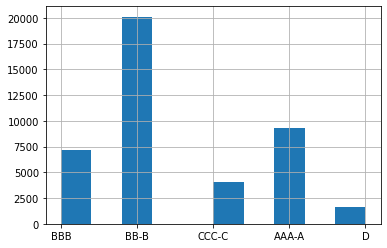

In [19]:
s_and_p["Curr Rtg"].hist()

In [20]:
s_and_p

,Company Name,Date,Rating Type,Agency,Curr Rtg,Last Rtg,Ctry,Industry Type,Security Name,non_default
6,Kansas Gas & Electric Co,2000-01-03,LT Local Issuer Credit,S&P,BBB,BBB,US,Electricity Networks,KGE US Equity,0
8,Starwood Hotels & Resorts Worldwide LLC,2000-01-03,LT Local Issuer Credit,S&P,BB-B,BB,US,Hotels (excluding Casino Hotels) & Motels,HOT US Equity,0
13,ThermaClime LLC,2000-01-03,LT Local Issuer Credit,S&P,CCC-C,D,US,Basic & Diversified Chemicals Manufacturing,9206Z US Equity,0
16,Compuware Corp,2000-01-03,LT Local Issuer Credit,S&P,BBB,NaN,US,Other Infrastructure Software,1519128D US Equity,0
17,Inamed Corp,2000-01-03,LT Local Issuer Credit,S&P,BB-B,NaN,US,Surgical Appliances & Supplies Manufacturing,3592185Q US Equity,0
...,...,...,...,...,...,...,...,...,...,...
289205,Road Infrastructure Investment Holdings Inc,2021-01-06,LT Local Issuer Credit,S&P,BBB,CCC,US,Security Systems Manufacturing,1410742D US Equity,0
289207,SK Holdco LLC,2021-01-06,LT Local Issuer Credit,S&P,CCC-C,CCC,US,NaN,1066042D US Equity,0
289214,Acadia Healthcare Co Inc,2021-01-05,LT Local Issuer Credit,S&P,BB-B,B,US,Psychiatric & Substance Abuse Hospitals,ACHC US Equity,0
289229,HGIM Corp,2021-01-05,LT Local Issuer Credit,S&P,D,CC,US,Non-Profit Organization,0876675D US Equity,0


In [21]:
from tqdm import tqdm_notebook
company_name = []
date = []
curr_rtg = []
industry_type = []
#rtg_num = {"AAA": 1, "AA": 2, "A": 3, "BBB": 4, "BB": 5, "B": 6, "CCC": 7, "CC": 8, "C": 9, "D": 10}
rtg_num = {"AAA-A": 1, "BBB": 2, "BB-B": 3, "CCC-C": 4, "D": 5}
for element in tqdm_notebook(s_and_p["Company Name"].unique()):
    company_df = s_and_p[s_and_p["Company Name"] == element]
    for _, row in company_df.sort_values("Date").iterrows():
        if row["Curr Rtg"] == "D":
            rtg_ = rtg_num[row["Curr Rtg"]]
            company_name.append(row["Company Name"])
            date.append(row["Date"])
            curr_rtg.append(rtg_)
            industry_type.append(row["Industry Type"])
            break
        rtg_ = rtg_num[row["Curr Rtg"]]
        company_name.append(row["Company Name"])
        date.append(row["Date"])
        curr_rtg.append(rtg_)
        industry_type.append(row["Industry Type"])
    

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/309389557.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for element in tqdm_notebook(s_and_p["Company Name"].unique()):


  0%|          | 0/9518 [00:00<?, ?it/s]

In [22]:
s_and_p = pd.DataFrame({"Company Name": company_name, "Date": date, 
                        "Curr Rtg": curr_rtg, "Industry Type": industry_type})
s_and_p.drop_duplicates(inplace = True)

In [23]:
s_and_p

,Company Name,Date,Curr Rtg,Industry Type
0,Kansas Gas & Electric Co,2000-01-03,2,Electricity Networks
1,Kansas Gas & Electric Co,2000-03-29,3,Electricity Networks
2,Kansas Gas & Electric Co,2000-05-19,3,Electricity Networks
3,Kansas Gas & Electric Co,2000-11-09,3,Electricity Networks
4,Kansas Gas & Electric Co,2001-07-25,3,Electricity Networks
...,...,...,...,...
40117,Crowdstrike Holdings Inc,2021-01-11,3,Infrastructure Software
40118,New Trojan Parent Inc,2021-01-11,3,"Apparel, Footwear & Accessories Design"
40119,Gloves Buyer Inc,2021-01-08,3,Industrial Equipment & Supplies Wholesalers
40120,Protective Industrial Products Inc,2021-01-08,3,Industrial Equipment & Supplies Wholesalers


In [24]:
import numpy as np
s_and_p['years'] = s_and_p.sort_values(['Company Name','Date']).groupby('Company Name')['Date'].diff() / np.timedelta64(1, 'Y')

In [25]:
s_and_p["years"] = s_and_p.groupby("Company Name")["years"].cumsum()

In [26]:
s_and_p["years"] = s_and_p["years"].fillna(0)

In [27]:
gdp = pd.read_csv("data/GDP.csv")

In [28]:
gdp["DATE"] = pd.to_datetime(gdp["DATE"])
gdp["DATE"] = gdp["DATE"].dt.to_period("Y")

In [29]:
gdp_year = gdp.groupby("DATE").sum()
gdp_year

,GDP
DATE,
1947,998.462
1948,1097.871
1949,1089.901
1950,1199.309
1951,1387.653
...,...
2017,77918.490
2018,82108.635
2019,85490.329


In [30]:
gdp_year = gdp_year.pct_change()

In [31]:
gdp_year.tail(15)

,GDP
DATE,
2007,0.047674
2008,0.020425
2009,-0.019756
2010,0.039432
2011,0.036598
2012,0.041939
2013,0.036251
2014,0.042005
2015,0.037340


In [32]:
s_and_p["Year"] = s_and_p["Date"].dt.to_period("Y")

<AxesSubplot:xlabel='Year'>

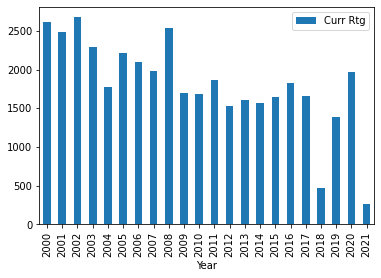

In [33]:
s_and_p[["Curr Rtg", "Year"]].groupby("Year").count().plot(kind = "bar")

<AxesSubplot:xlabel='DATE'>

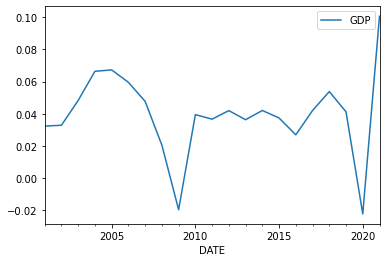

In [34]:
gdp_year[gdp_year.index > pd.Period("2000")].plot()

In [35]:
s_and_p = s_and_p.join(other = gdp_year, on = "Year")

#Оценка матриц

## Матрица на всей выборке

In [36]:
# Убираем 2021 как выброс
s_and_p = s_and_p[s_and_p["Year"].dt.year != 2021] 

In [37]:
s_and_p

,Company Name,Date,Curr Rtg,Industry Type,years,Year,GDP
0,Kansas Gas & Electric Co,2000-01-03,2,Electricity Networks,0.000000,2000,0.064351
1,Kansas Gas & Electric Co,2000-03-29,3,Electricity Networks,0.235460,2000,0.064351
2,Kansas Gas & Electric Co,2000-05-19,3,Electricity Networks,0.375093,2000,0.064351
3,Kansas Gas & Electric Co,2000-11-09,3,Electricity Networks,0.851489,2000,0.064351
4,Kansas Gas & Electric Co,2001-07-25,3,Electricity Networks,1.557869,2001,0.032287
...,...,...,...,...,...,...,...
40063,Varex Imaging Corp,2020-10-02,3,Medical Equipment Manufacturing,0.000000,2020,-0.022404
40064,Vistra Corp,2020-10-02,3,Fossil Electric - Unregulated,0.000000,2020,-0.022404
40066,BRP Group Inc,2020-10-01,3,Insurance Brokers & Services,0.000000,2020,-0.022404
40067,Chinos Intermediate 2 LLC,2020-10-01,3,Specialty Apparel Stores,0.000000,2020,-0.022404


In [38]:
import scipy.linalg as la
data = s_and_p
matrix_norm_mean = []
downgrades_mean = []
upgrades_mean = []
probs_year = {}
time_matrix = np.zeros((5, 5))
change_matrix = np.zeros((5, 5))
for company in tqdm(data["Company Name"].unique()):
    lender = data[data["Company Name"] == company]
    for i in range(1, len(lender)):
        index_ = lender.iloc[i]["Curr Rtg"] - 1, lender.iloc[i - 1]["Curr Rtg"] - 1
        time_ = lender.iloc[i]["Date"] - lender.iloc[i - 1]["Date"]
        if len(lender) == 1:
            time_ = pd.Timestamp(year = 2020, month = 12, day = 31) - lender["Date"].values[0]
            time_matrix[lender["Curr Rtg"] - 1, lender["Curr Rtg"] - 1] += time_.days
        else:
            if index_[0] != index_[1]:
                change_matrix[index_[1], index_[0]] += 1
                time_matrix[index_[1], index_[1]] += time_.days
            else:
                time_matrix[index_[0], index_[0]] += time_.days
year_matrix = (np.diag(time_matrix) / 365) + 1e-5
year_matrix[-1] = 1
G = change_matrix / year_matrix.reshape(5, 1)
row_sum = G.sum(axis = 1)
np.fill_diagonal(G, -row_sum)
proba = la.expm(G * 1)

  0%|          | 0/9465 [00:00<?, ?it/s]

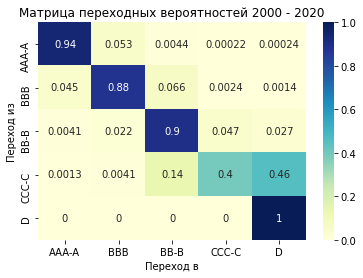

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(proba, annot = True, cmap = "YlGnBu",
            xticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"], yticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"])
ax.set(xlabel = "Переход в", ylabel = "Переход из", title = "Матрица переходных вероятностей 2000 - 2020")
plt.show()

## Годовые матрицы

  0%|          | 0/1873 [00:00<?, ?it/s]

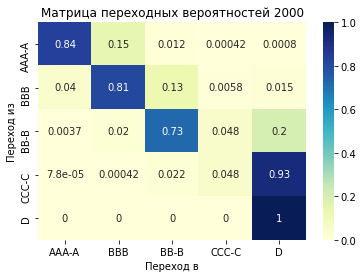

  0%|          | 0/1635 [00:00<?, ?it/s]

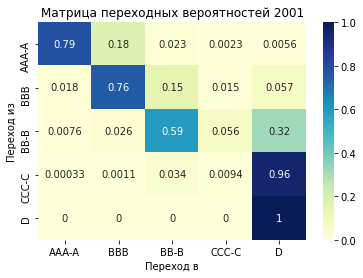

  0%|          | 0/1631 [00:00<?, ?it/s]

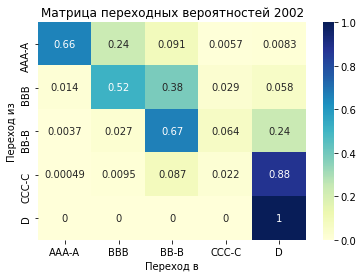

  0%|          | 0/1505 [00:00<?, ?it/s]

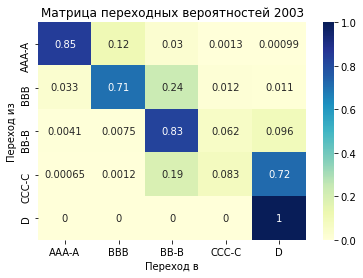

  0%|          | 0/1244 [00:00<?, ?it/s]

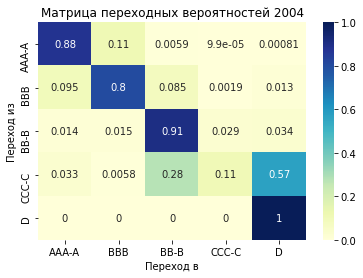

  0%|          | 0/1503 [00:00<?, ?it/s]

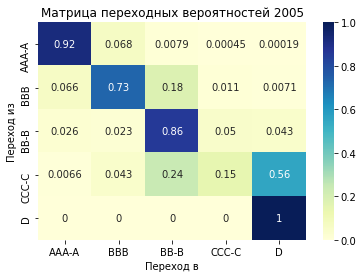

  0%|          | 0/1474 [00:00<?, ?it/s]

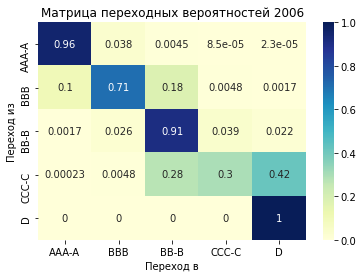

  0%|          | 0/1435 [00:00<?, ?it/s]

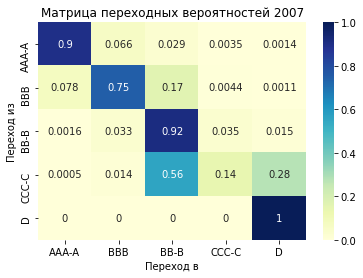

  0%|          | 0/1374 [00:00<?, ?it/s]

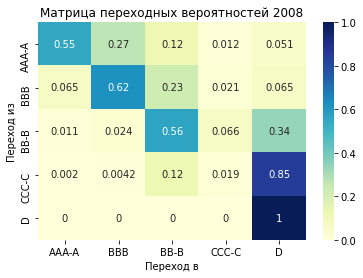

  0%|          | 0/1142 [00:00<?, ?it/s]

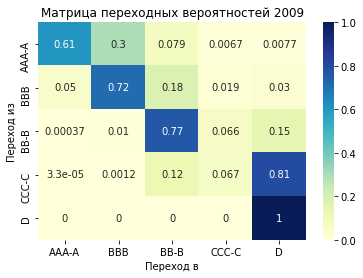

  0%|          | 0/1269 [00:00<?, ?it/s]

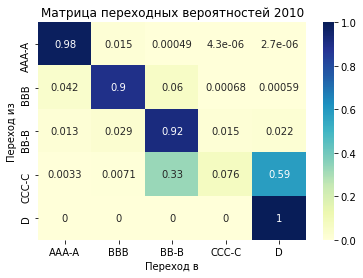

  0%|          | 0/1440 [00:00<?, ?it/s]

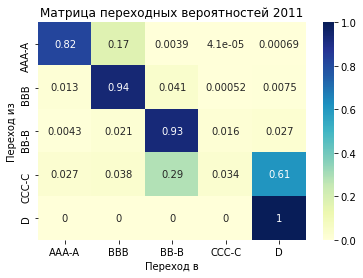

  0%|          | 0/1155 [00:00<?, ?it/s]

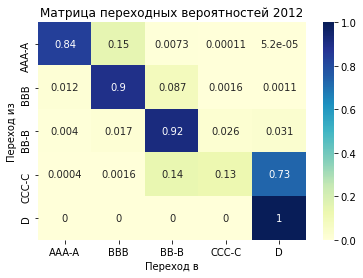

  0%|          | 0/1272 [00:00<?, ?it/s]

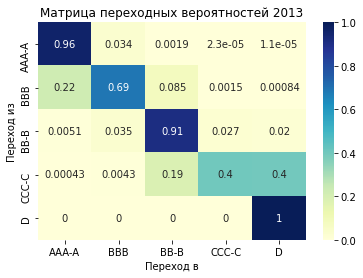

  0%|          | 0/1264 [00:00<?, ?it/s]

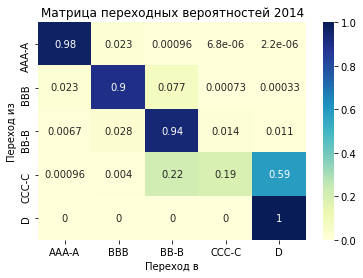

  0%|          | 0/1275 [00:00<?, ?it/s]

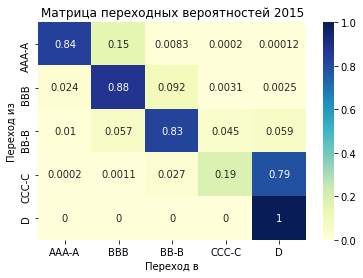

  0%|          | 0/1378 [00:00<?, ?it/s]

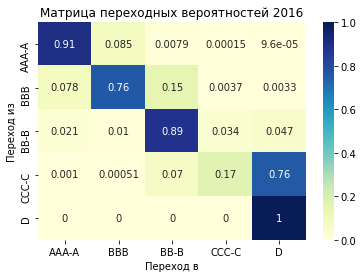

  0%|          | 0/1270 [00:00<?, ?it/s]

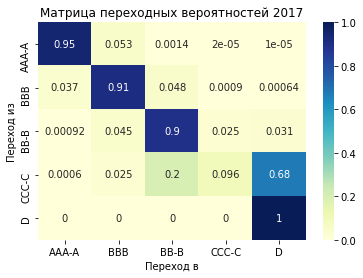

  0%|          | 0/433 [00:00<?, ?it/s]

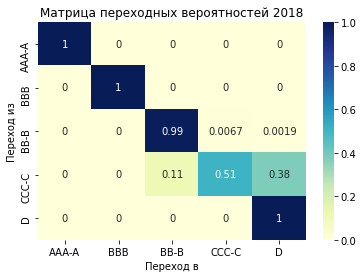

  0%|          | 0/1108 [00:00<?, ?it/s]

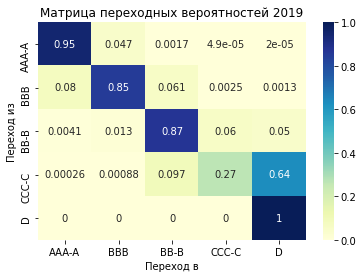

  0%|          | 0/1354 [00:00<?, ?it/s]

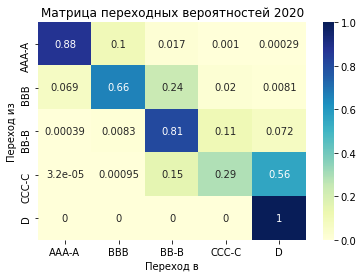

22208.687964155557


In [40]:
import scipy.linalg as la
import matplotlib.pyplot as plt
norms = []
years = []
upgrades = []
transitions = {}
downgrades = []
defaults = []
matrices = {}
chi_sq = 0
for year in sorted(s_and_p["Year"].unique()):
    change_matrix = np.zeros((5, 5))
    time_matrix = np.zeros((5, 5))
    data = s_and_p[s_and_p["Year"] == year][["Curr Rtg", "Company Name", "Date"]]
    for company in tqdm(data["Company Name"].unique()):
        lender = data[data["Company Name"] == company]
        if len(lender) == 1:
            time_ = pd.Timestamp(year = year.year, month = 12, day = 31) - lender["Date"].values[0]
            time_matrix[lender["Curr Rtg"] - 1, lender["Curr Rtg"] - 1] += time_.days
        else:
            for i in range(1, len(lender)):
                index_ = lender.iloc[i]["Curr Rtg"] - 1, lender.iloc[i - 1]["Curr Rtg"] - 1
                time_ = lender.iloc[i]["Date"] - lender.iloc[i - 1]["Date"]
                if index_[0] != index_[1]:
                    change_matrix[index_[1], index_[0]] += 1
                    time_matrix[index_[1], index_[1]] += time_.days / 365
                else:
                    time_matrix[index_[0], index_[0]] += time_.days / 365
    
    # Calc matrix
    year_matrix = (np.diag(time_matrix) / 365) + 1e-5
    year_matrix[-1] = 1
    G = change_matrix / year_matrix.reshape(5, 1)
    row_sum = G.sum(axis = 1)
    np.fill_diagonal(G, -row_sum)
    proba_year = la.expm(G * 1)
    
    # Calc norms and upgrades/downgrades/defaults
    matrix_norm = la.norm(proba_year)
    downgrade = np.triu(proba_year, k = 1).sum(axis = 1)
    upgrade = np.tril(proba_year, k = -1).sum(axis = 1)
    downgrades.append(downgrade)
    upgrades.append(upgrade)
    defaults.append(proba_year[:, 4])
    norms.append(matrix_norm)
    years.append(year.year)
    matrices[year.year] = proba_year
    transitions[year.year] = change_matrix

    # Chi-square distance
    n_i = data.groupby("Company Name").head(1).groupby("Curr Rtg").count()["Company Name"].values.reshape(5, 1)
    difference = (((proba_year - proba) ** 2) / (proba + 1e-50)) * ((proba_year != 0) & (proba != 0))
    chi_sq += (n_i * difference).sum()

    ax = sns.heatmap(proba_year, annot = True, cmap = "YlGnBu",
            xticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"], yticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"])
    ax.set(xlabel = "Переход в", ylabel = "Переход из", title = "Матрица переходных вероятностей " + str(year))
    plt.show()
print(chi_sq)

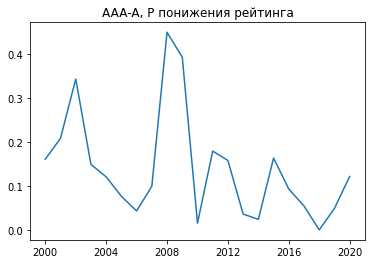

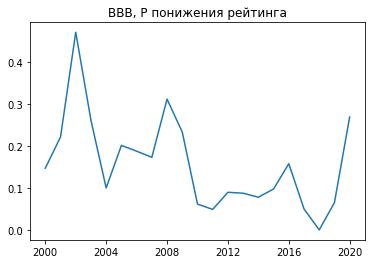

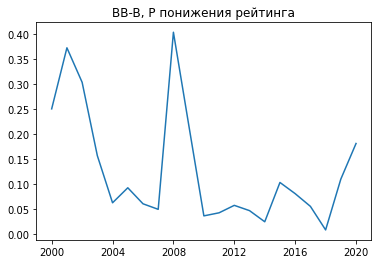

In [41]:
import matplotlib.pyplot as plt
import datetime
downgrades = np.array(downgrades)
years = [datetime.date(i, 1, 1) for i in range(2000, 2021)]
titles = ["AAA-A, P понижения рейтинга", "BBB, P понижения рейтинга", "BB-B, P понижения рейтинга", "CCC-C, P понижения рейтинга"]
for i in range(3):
    plt.title(titles[i])
    plt.plot(years, downgrades[:, i], label = "Эмпирический")
    plt.show()

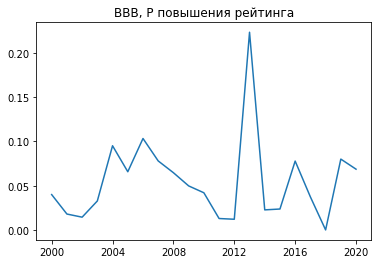

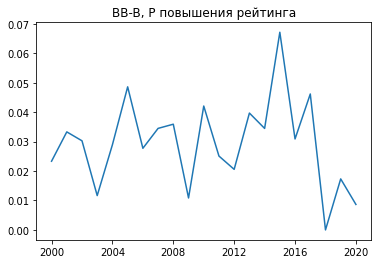

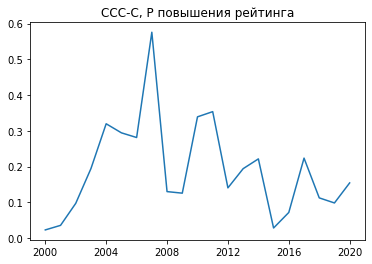

In [42]:
import matplotlib.pyplot as plt
upgrades = np.array(upgrades)
titles = ["AAA-A, P повышения рейтинга", "BBB, P повышения рейтинга", "BB-B, P повышения рейтинга", "CCC-C, P повышения рейтинга"]
for i in range(1, 4):
    plt.title(titles[i])
    plt.plot(years, upgrades[:, i], label = "Эмпирический")
    plt.show()

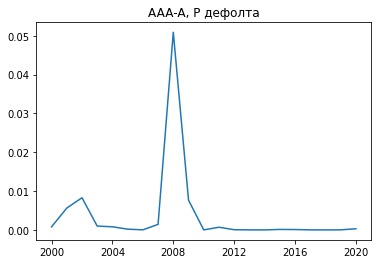

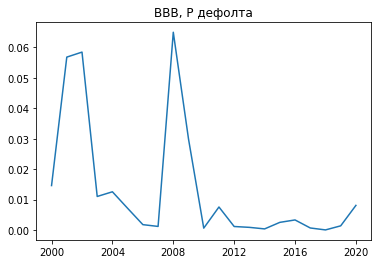

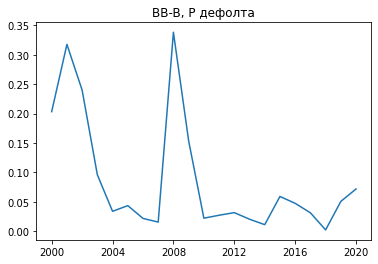

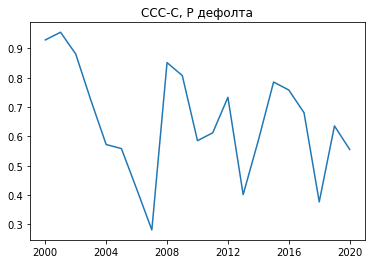

In [43]:
import matplotlib.pyplot as plt
defaults = np.array(defaults)
titles = ["AAA-A, P дефолта", "BBB, P дефолта", "BB-B, P дефолта", "CCC-C, P дефолта"]
for i in range(4):
    plt.title(titles[i])
    plt.plot(years, defaults[:, i], label = "Эмпирический")
    plt.show()

# Регрессоры

## ВВП

In [44]:
train = s_and_p[s_and_p["Year"].dt.year < 2018]
speculative_grade = train[train["Curr Rtg"] > 2]
speculative_grade["Default"] = (speculative_grade["Curr Rtg"] != 5).astype(int)

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/982925431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speculative_grade["Default"] = (speculative_grade["Curr Rtg"] != 5).astype(int)


In [45]:
endog = speculative_grade["Default"].to_numpy()
exog = speculative_grade["GDP"].to_numpy()

In [46]:
from statsmodels.discrete.discrete_model import Probit
probit = Probit(endog, exog)
fitted = probit.fit()

c:\users\tatyana\appdata\local\programs\python\python38\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Optimization terminated successfully.
         Current function value: 0.270883
         Iterations 6


In [47]:
fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Probit
=================================================================
Model:              Probit           Pseudo R-squared: -0.294    
Dependent Variable: y                AIC:              11132.5891
Date:               2022-04-30 18:31 BIC:              11140.5195
No. Observations:   20545            Log-Likelihood:   -5565.3   
Df Model:           0                LL-Null:          -4301.5   
Df Residuals:       20544            LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       35.1429     0.3457   101.6547   0.0000   34.4654   35.8205
=================================================================

"""

In [48]:
gdp_train = gdp_year[gdp_year.index > pd.Period("1999")]
gdp_train = gdp_train[gdp_train.index < pd.Period("2018")]

In [49]:
exog = gdp_train["GDP"].values

In [50]:
exog

array([ 0.06435149,  0.03228744,  0.03280869,  0.04825108,  0.06640332,
        0.06728232,  0.05954247,  0.04767399,  0.02042489, -0.01975609,
        0.03943228,  0.03659797,  0.04193907,  0.03625119,  0.04200462,
        0.03733961,  0.02686376,  0.04196375])

In [51]:
prediction = probit.predict(fitted.params)

In [52]:
speculative_grade["Probit"] = prediction 

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/1506189363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speculative_grade["Probit"] = prediction


In [53]:
scores = speculative_grade[["Year", "Probit"]].drop_duplicates().sort_values("Year")

In [54]:
from scipy.stats import norm
scores["Z"] = norm.ppf(scores["Probit"])
mean = scores["Z"].mean()
std = scores["Z"].std()
scores["Z"] = (scores["Z"] - mean) / std

In [55]:
scores

,Year,Probit,Z
1,2000,0.988136,1.210683
4,2001,0.871744,-0.389512
6,2002,0.875544,-0.363499
7,2003,0.955027,0.407173
18,2004,0.990192,1.313082
19,2005,0.990973,1.356950
79,2006,0.981803,0.970683
169,2007,0.953073,0.378372
22,2008,0.763557,-0.981528
23,2009,0.243751,-2.986809


In [56]:
def pmatrix(pmatrix_base, z, gamma_invest, gamma_spec):
    gammas = np.ones((5, 1))
    gammas[:2, :] = gamma_invest
    gammas[2:, :] = gamma_spec
    x = norm.ppf(pmatrix_base[:, ::-1].cumsum(axis = 1))
    x[:, -1] = np.inf
    scaled = (x - gammas * z) / np.sqrt(1 - gammas ** 2)
    cdf = norm.cdf(scaled) 
    return np.diff(cdf, prepend=0)[:, ::-1]

In [57]:
# mae = float("inf")
# for i in tqdm(np.arange(1, -1, -0.01)):
#     for j in np.arange(1, -1, -0.01):
#         mae_loss = 0
#         for year in scores["Year"]:
#             pmatrix_true = matrices[year.year]
#             transition = transitions[year.year]
#             pmatrix_hat = pmatrix(proba, scores[scores["Year"] == year].Z.values, i, j)
#             mae_loss += np.abs(pmatrix_true - pmatrix_hat).mean()
#         mae_loss /= len(scores)
#         if mae_loss < mae:
#             mae = mae_loss
#             optimal = i, j

# print(optimal)
optimal = (0.26999999999999935, 0.23999999999999932)

In [58]:
gdp_test = gdp_year[gdp_year.index >= pd.Period("2018")]
gdp_test = gdp_test[gdp_test.index != pd.Period("2021")]
exog = gdp_test["GDP"].values.reshape((3, 1))
prediction = probit.predict(fitted.params, exog = exog)

In [59]:
gdp_test["Probit"] = prediction

In [60]:
gdp_test["Z"] = (norm.ppf(gdp_test["Probit"]) - mean) / std

In [61]:
years

[datetime.date(2000, 1, 1),
 datetime.date(2001, 1, 1),
 datetime.date(2002, 1, 1),
 datetime.date(2003, 1, 1),
 datetime.date(2004, 1, 1),
 datetime.date(2005, 1, 1),
 datetime.date(2006, 1, 1),
 datetime.date(2007, 1, 1),
 datetime.date(2008, 1, 1),
 datetime.date(2009, 1, 1),
 datetime.date(2010, 1, 1),
 datetime.date(2011, 1, 1),
 datetime.date(2012, 1, 1),
 datetime.date(2013, 1, 1),
 datetime.date(2014, 1, 1),
 datetime.date(2015, 1, 1),
 datetime.date(2016, 1, 1),
 datetime.date(2017, 1, 1),
 datetime.date(2018, 1, 1),
 datetime.date(2019, 1, 1),
 datetime.date(2020, 1, 1)]

Text(0.5, 1.0, 'Z-индекс на основе ВВП')

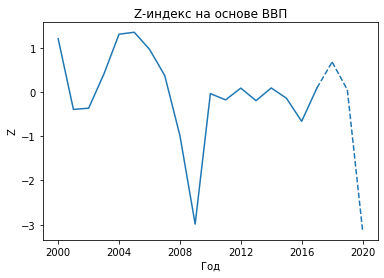

In [62]:
plt.plot(years[:-3], scores["Z"].values)
plt.plot(years[-3:], gdp_test["Z"].values, color = "C0", linestyle = "dashed")
plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [scores["Z"].values[-1], gdp_test["Z"].values[0]], color = "C0",
         linestyle = "dashed")
plt.ylabel("Z")
plt.xlabel("Год")
plt.title("Z-индекс на основе ВВП")

In [63]:
hat_norms = []
downgrades_hat = []
upgrades_hat = []
pmatrices_hat = {}
for year in scores["Year"]:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = pmatrix(proba, scores[scores["Year"] == year].Z.values, *optimal)
    hat_norms.append(la.norm(pmatrix_hat))
    downgrades_hat.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat[year.year] = pmatrix_hat

In [64]:
hat_norms_test = []
downgrades_hat_test = []
upgrades_hat_test = []
mae = 0
for year in gdp_test.index:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = pmatrix(proba, gdp_test[gdp_test.index == year].Z.values, *optimal)
    np.where(pmatrix_hat > 0, pmatrix_hat, 0)
    mae += np.abs(pmatrix_true - pmatrix_hat).mean()
    hat_norms_test.append(la.norm(pmatrix_hat))
    downgrades_hat_test.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat_test.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat[year.year] = pmatrix_hat
mae / 3

0.026500213645837767

In [65]:
hat_norms

[1.9889454098123307,
 1.9762421175828544,
 1.9768319869025432,
 1.9885865284434903,
 1.9881379165051178,
 1.9877348442911558,
 1.9900944326803713,
 1.9883486659679717,
 1.9595564932333382,
 1.8662697766197438,
 1.9832389322996697,
 1.9807457974239449,
 1.9851312244871517,
 1.9804151323144359,
 1.9851767489746182,
 1.9814342577412734,
 1.9693780115388873,
 1.9851483890232327]

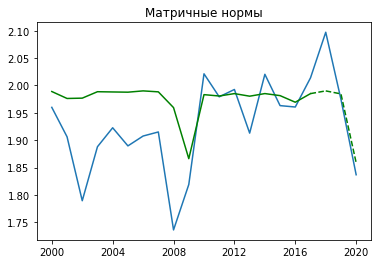

In [66]:
import matplotlib.pyplot as plt
plt.title("Матричные нормы")
plt.plot(years, norms, label = "Эмпирические")
plt.plot(years[:-3], hat_norms, label = "Оценка", color = "green")
plt.plot(years[-3:], hat_norms_test, linestyle = "dashed", color = "green", label = "Предсказание")
plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [hat_norms[-1], hat_norms_test[0]], linestyle = "dashed",
             color = "green")

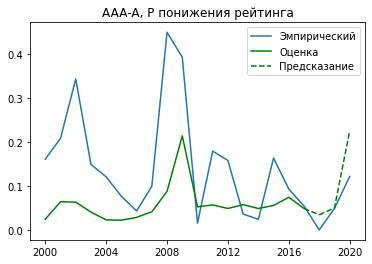

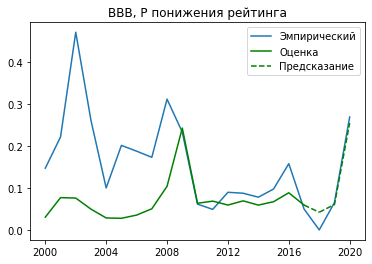

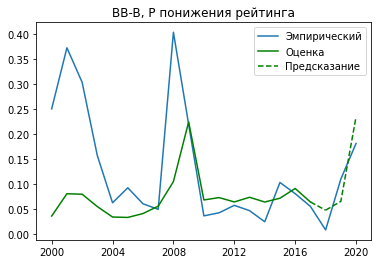

In [67]:
downgrades = np.array(downgrades)
downgrades_mean = np.array(downgrades_mean)
downgrades_hat = np.array(downgrades_hat)
downgrades_hat_test = np.array(downgrades_hat_test)
titles = ["AAA-A, P понижения рейтинга", "BBB, P понижения рейтинга", "BB-B, P понижения рейтинга", "CCC-C, P понижения рейтинга"]
for i in range(3):
    plt.title(titles[i])
    plt.plot(years, downgrades[:, i], label = "Эмпирический")
    plt.plot(years[:-3], downgrades_hat[:, i], label = "Оценка", color = "green")
    plt.plot(years[-3:], downgrades_hat_test[:, i], linestyle = "dashed", color = "green", label = "Предсказание")
    plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [downgrades_hat[-1, i], downgrades_hat_test[0, i]], linestyle = "dashed",
             color = "green")
    plt.legend()
    plt.show()

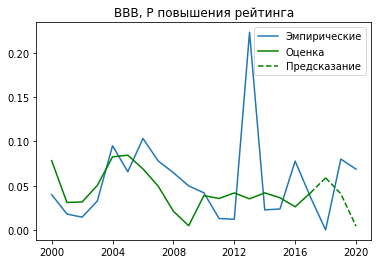

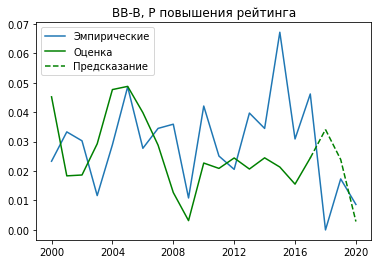

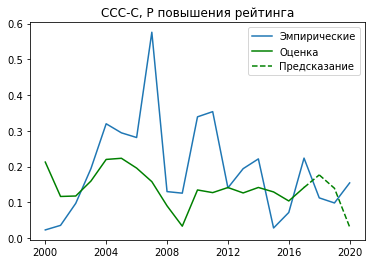

In [68]:
upgrades = np.array(upgrades)
upgrades_mean = np.array(upgrades_mean)
upgrades_hat = np.array(upgrades_hat)
upgrades_hat_test = np.array(upgrades_hat_test)
titles = ["AAA-A, P повышения рейтинга", "BBB, P повышения рейтинга", "BB-B, P повышения рейтинга", "CCC-C, P повышения рейтинга"]
for i in range(1, 4):
    plt.title(titles[i])
    plt.plot(years, upgrades[:, i], label = "Эмпирические")
    plt.plot(years[:-3], upgrades_hat[:, i], label = "Оценка", color = "green")
    plt.plot(years[-3:], upgrades_hat_test[:, i], color = "green", linestyle = "dashed", label = "Предсказание")
    plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [upgrades_hat[-1, i], upgrades_hat_test[0, i]], linestyle = "dashed",
             color = "green")
    plt.legend()
    plt.show()

In [69]:
gdp_not_growth = pd.read_csv("data/GDP.csv")
gdp_not_growth["DATE"] = pd.to_datetime(gdp_not_growth["DATE"])
gdp_not_growth["DATE"] = gdp_not_growth["DATE"].dt.to_period("Y")
gdp_not_growth = gdp_not_growth.groupby("DATE").sum()
gdp_ = gdp_not_growth[(gdp_not_growth.index > pd.Period(1999)) & (gdp_not_growth.index != pd.Period(2021))].values

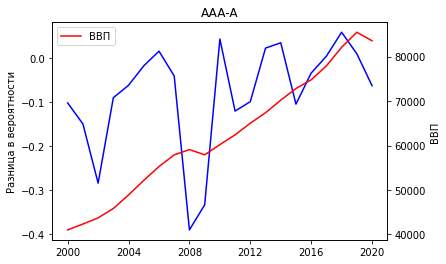

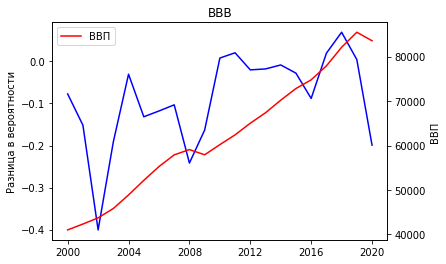

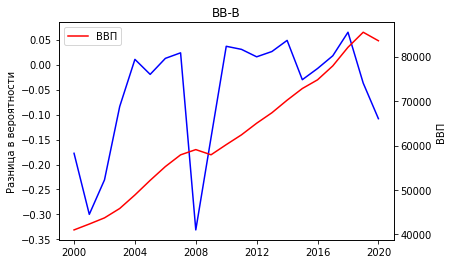

In [70]:
downgrades_mean = np.triu(proba, k = 1).sum(axis = 1)
differences = []
titles = ["AAA-A", "BBB", "BB-B"]
for i in range(3):
    differences_by_time = []
    for j in range(downgrades.shape[0]):
        difference = downgrades_mean[i] - downgrades[j, i]
        differences_by_time.append(difference)
    fig, ax1 = plt.subplots()
    ax1.plot(years, differences_by_time, label = "Разницы", color = "blue")
    ax1.set_ylabel("Разница в вероятности")
    ax2 = ax1.twinx()
    ax2.plot(years, gdp_, color = "red", label = "ВВП")
    ax2.set_ylabel("ВВП")
    plt.title(titles[i])
    plt.legend()
    plt.show()

* Dot-Com Bubble не отражается в ВВП, в 2000 году был ускоренный рост ВВП на фоне, которого было высокое количество понижений рейтингов 
* В 2008 году ВВП не сразу реагирует - на фоне большого количества дефолтов рост ВВП замедляется, но не уходит в отрицательную зону. Модель реагирует на кризис в 2009 - когда ВВП демонстрирует значительное падение. Сила влияния кризиса на AAA-A модель недооценивает
* Кризис 2020 года оценивается корректно
* В 2015 - 2018 годах происходят флуктации рейтингов на фоне спокойной экономической ситуации - эта вариация не обьясняется моделью ВВП
* Рост ВВП нашел замедлятся, но дошел до отрицательных значений только в 2009 году
* В 2010 - 2018 на фоне стабильного роста ВВП и хорошей экономической ситуации происходит колебания вероятности понижения рейтинга

In [71]:
CDS = pd.read_csv("data/CDS.csv", sep = ";")

In [72]:
CDS

,Dates,PX_LAST,PX_BID,PX_ASK
0,09.09.2011,"132,25","130,75","132,25"
1,12.09.2011,"135,75","134,25","135,75"
2,13.09.2011,"132,25","130,75","132,25"
3,14.09.2011,"129,75","128,75","129,75"
4,15.09.2011,"125,75","124,25","125,75"
...,...,...,...,...
2366,01.03.2021,"52,711","52,505","52,918"
2367,02.03.2021,"53,369","52,635","54,102"
2368,03.03.2021,"54,595","53,972","55,218"
2369,04.03.2021,"56,494","55,93","57,058"


In [73]:
CDS["PX_LAST"] = CDS["PX_LAST"].str.replace(",", ".").astype(float)

In [74]:
CDS["Dates"] = pd.to_datetime(CDS["Dates"], format = "%d.%m.%Y")
CDS["Dates"] = CDS["Dates"].dt.to_period("Y")

In [75]:
CDS

,Dates,PX_LAST,PX_BID,PX_ASK
0,2011,132.250,"130,75","132,25"
1,2011,135.750,"134,25","135,75"
2,2011,132.250,"130,75","132,25"
3,2011,129.750,"128,75","129,75"
4,2011,125.750,"124,25","125,75"
...,...,...,...,...
2366,2021,52.711,"52,505","52,918"
2367,2021,53.369,"52,635","54,102"
2368,2021,54.595,"53,972","55,218"
2369,2021,56.494,"55,93","57,058"


In [76]:
CDS_year = CDS.groupby("Dates").mean()
CDS_year["PX_LAST"] = CDS_year["PX_LAST"].pct_change()

In [77]:
CDS = CDS_year

<AxesSubplot:xlabel='Dates'>

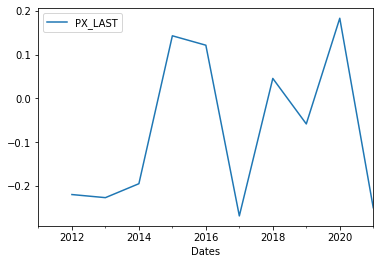

In [78]:
CDS.plot()

In [79]:
s_and_p["Year"].dtype

period[A-DEC]

In [80]:
CDS

,PX_LAST
Dates,
2011,NaN
2012,-0.219669
2013,-0.226742
2014,-0.194912
2015,0.142718
2016,0.121217
2017,-0.268440
2018,0.045390
2019,-0.058461


In [81]:
CDS.dropna(inplace = True)

In [82]:
s_and_p_CDS = s_and_p.merge(CDS, left_on = "Year", right_on = "Dates")
s_and_p_CDS = s_and_p_CDS.dropna()

In [83]:
s_and_p_CDS

,Company Name,Date,Curr Rtg,Industry Type,years,Year,GDP,PX_LAST
0,Kansas Gas & Electric Co,2014-04-29,2,Electricity Networks,14.319254,2014,0.042005,-0.194912
1,Westar Energy Inc,2014-04-29,2,Integrated Utilities,14.319254,2014,0.042005,-0.194912
2,Kansas City Power & Light Co,2014-05-01,2,Electricity Marketing - Wholesale,14.324729,2014,0.042005,-0.194912
3,Tucson Electric Power Co,2014-10-28,2,Integrated Utilities,14.814815,2014,0.042005,-0.194912
4,Louisville Gas & Electric Co,2014-06-10,2,Integrated Utilities,14.423294,2014,0.042005,-0.194912
...,...,...,...,...,...,...,...,...
13662,Perspecta Inc,2018-04-18,3,Information Technology (IT) Services,0.000000,2018,0.053776,0.045390
13663,Albertsons Cos Inc,2018-04-18,3,Supermarkets,0.000000,2018,0.053776,0.045390
13664,Legacy Vulcan LLC,2018-04-19,2,Sand & Gravel Mining,0.000000,2018,0.053776,0.045390
13665,Compass IV Ltd,2018-04-20,3,Time-Share Revenue - Hotels,0.000000,2018,0.053776,0.045390


In [84]:
s_and_p_CDS

,Company Name,Date,Curr Rtg,Industry Type,years,Year,GDP,PX_LAST
0,Kansas Gas & Electric Co,2014-04-29,2,Electricity Networks,14.319254,2014,0.042005,-0.194912
1,Westar Energy Inc,2014-04-29,2,Integrated Utilities,14.319254,2014,0.042005,-0.194912
2,Kansas City Power & Light Co,2014-05-01,2,Electricity Marketing - Wholesale,14.324729,2014,0.042005,-0.194912
3,Tucson Electric Power Co,2014-10-28,2,Integrated Utilities,14.814815,2014,0.042005,-0.194912
4,Louisville Gas & Electric Co,2014-06-10,2,Integrated Utilities,14.423294,2014,0.042005,-0.194912
...,...,...,...,...,...,...,...,...
13662,Perspecta Inc,2018-04-18,3,Information Technology (IT) Services,0.000000,2018,0.053776,0.045390
13663,Albertsons Cos Inc,2018-04-18,3,Supermarkets,0.000000,2018,0.053776,0.045390
13664,Legacy Vulcan LLC,2018-04-19,2,Sand & Gravel Mining,0.000000,2018,0.053776,0.045390
13665,Compass IV Ltd,2018-04-20,3,Time-Share Revenue - Hotels,0.000000,2018,0.053776,0.045390


In [85]:
train = s_and_p_CDS[s_and_p_CDS["Year"].dt.year < 2018]
speculative_grade = train[train["Curr Rtg"] > 2]
speculative_grade["Default"] = (speculative_grade["Curr Rtg"] != 5).astype(int)

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/4129532457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speculative_grade["Default"] = (speculative_grade["Curr Rtg"] != 5).astype(int)


In [86]:
speculative_grade.groupby("Year").mean()["Default"]

Year
2012    0.968008
2013    0.978881
2014    0.984879
2015    0.958121
2016    0.921358
2017    0.961468
Freq: A-DEC, Name: Default, dtype: float64

In [87]:
endog = speculative_grade["Default"].to_numpy()
exog = speculative_grade["PX_LAST"].to_numpy()

In [88]:
from statsmodels.discrete.discrete_model import Probit
probit = Probit(endog, exog)
fitted_cds = probit.fit()

Optimization terminated successfully.
         Current function value: 0.555423
         Iterations 5


In [89]:
fitted_cds.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Probit
================================================================
Model:              Probit           Pseudo R-squared: -2.379   
Dependent Variable: y                AIC:              6773.7111
Date:               2022-04-30 18:31 BIC:              6780.4265
No. Observations:   6096             Log-Likelihood:   -3385.9  
Df Model:           0                LL-Null:          -1001.9  
Df Residuals:       6095             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -3.5717     0.0926   -38.5846   0.0000   -3.7531   -3.3902
================================================================

"""

In [90]:
prediction = probit.predict(fitted_cds.params)

In [91]:
speculative_grade["Probit"] = prediction

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/2728747781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speculative_grade["Probit"] = prediction


In [92]:
scores = speculative_grade[["Year", "Probit"]].drop_duplicates().sort_values("Year")
scores["Z"] = norm.ppf(scores["Probit"])
mean = scores["Z"].mean()
std = scores["Z"].std()
scores["Z"] = (scores["Z"] - mean) / std

In [93]:
scores

,Year,Probit,Z
1578,2012,0.783651,0.598382
6722,2013,0.790985,0.636160
10,2014,0.756835,0.466147
5071,2015,0.305117,-1.337203
9987,2016,0.332527,-1.222361
8331,2017,0.831164,0.858875


In [94]:
# mae = float("inf")
# for i in tqdm(np.arange(-1, 1, 0.01)):
#     for j in np.arange(-1, 1, 0.01):
#         mae_loss = 0
#         for year in scores["Year"]:
#             pmatrix_true = matrices[year.year]
#             transition = transitions[year.year]
#             pmatrix_hat = pmatrix(proba, scores[scores["Year"] == year].Z.values, i, j)
#             mae_loss += np.abs(pmatrix_true - pmatrix_hat).mean()
#         mae_loss /= len(scores)
#         if mae_loss < mae:
#             mae = mae_loss
#             optimal = i, j

# print(optimal)
optimal = (0.2300000000000011, 0.28000000000000114)

In [95]:
CDS_test = CDS[CDS.index >= pd.Period("2018")]
CDS_test = CDS_test[CDS_test.index != pd.Period("2021")]
exog = CDS_test["PX_LAST"].values.reshape((3, 1))
prediction = probit.predict(fitted_cds.params, exog = exog)
CDS_test["Probit"] = prediction

In [96]:
CDS_test

,PX_LAST,Probit
Dates,,
2018,0.045390,0.435607
2019,-0.058461,0.582699
2020,0.182772,0.256943


In [97]:
CDS_test["Z"] = (norm.ppf(CDS_test["Probit"]) - mean) / std

In [98]:
CDS_test

,PX_LAST,Probit,Z
Dates,,,
2018,0.045390,0.435607,-0.817352
2019,-0.058461,0.582699,-0.262662
2020,0.182772,0.256943,-1.551141


Text(0.5, 1.0, 'Z-индекс на основе CDS')

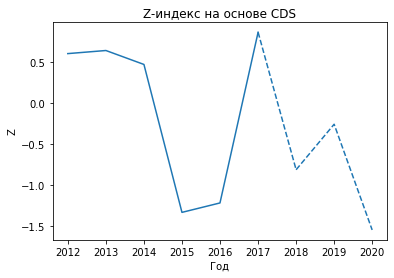

In [99]:
plt.plot(years[12:-3], scores["Z"].values)
plt.plot(years[-3:], CDS_test["Z"].values, color = "C0", linestyle = "dashed")
plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [scores["Z"].values[-1], CDS_test["Z"].values[0]], color = "C0",
         linestyle = "dashed")
plt.ylabel("Z")
plt.xlabel("Год")
plt.title("Z-индекс на основе CDS")

In [100]:
hat_norms = []
downgrades_hat = []
upgrades_hat = []
pmatrices_hat_cds = {}
for year in scores["Year"]:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = pmatrix(proba, scores[scores["Year"] == year].Z.values, *optimal)
    hat_norms.append(la.norm(pmatrix_hat))
    downgrades_hat.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat[year.year] = pmatrix_hat

In [101]:
hat_norms_test = []
downgrades_hat_test = []
upgrades_hat_test = []
mae = 0
for year in CDS_test.index:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = pmatrix(proba, CDS_test[CDS_test.index == year].Z.values, *optimal)
    mae += np.abs(pmatrix_true - pmatrix_hat).mean()
    hat_norms_test.append(la.norm(pmatrix_hat))
    downgrades_hat_test.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat_test.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat_cds[year.year] = pmatrix_hat
mae / 3

0.028379143758202732

In [102]:
hat_norms

[1.9882024121450659,
 1.988325278807958,
 1.987592071715163,
 1.9532589579863953,
 1.9567600085772532,
 1.9885808448475344]

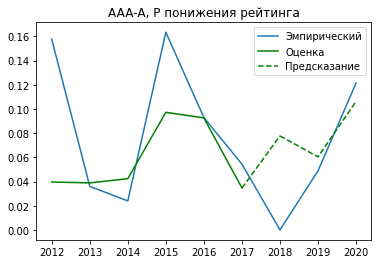

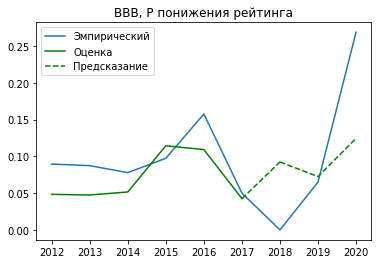

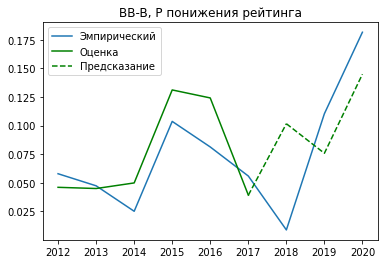

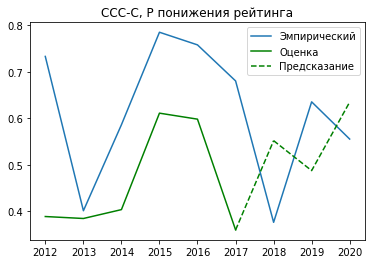

In [103]:
downgrades = np.array(downgrades)
downgrades_mean = np.array(downgrades_mean)
downgrades_hat = np.array(downgrades_hat)
downgrades_hat_test = np.array(downgrades_hat_test)
titles = ["AAA-A, P понижения рейтинга", "BBB, P понижения рейтинга", "BB-B, P понижения рейтинга", "CCC-C, P понижения рейтинга"]
for i in range(4):
    plt.title(titles[i])
    plt.plot(years[12:], downgrades[12:, i], label = "Эмпирический")
    plt.plot(years[12:-3], downgrades_hat[:, i], label = "Оценка", color = "green")
    plt.plot(years[-3:], downgrades_hat_test[:, i], linestyle = "dashed", color = "green", label = "Предсказание")
    plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [downgrades_hat[-1, i], downgrades_hat_test[0, i]], linestyle = "dashed",
             color = "green")
    plt.legend()
    plt.show()

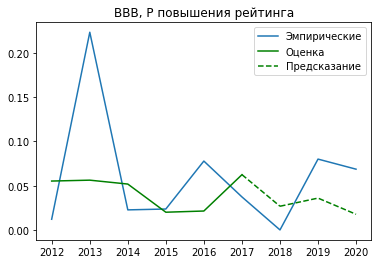

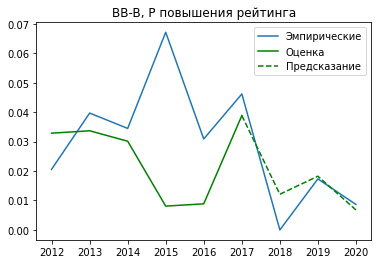

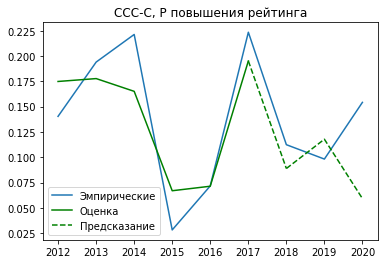

In [104]:
upgrades = np.array(upgrades)
upgrades_mean = np.array(upgrades_mean)
upgrades_hat = np.array(upgrades_hat)
upgrades_hat_test = np.array(upgrades_hat_test)
titles = ["AAA-A, P повышения рейтинга", "BBB, P повышения рейтинга", "BB-B, P повышения рейтинга", "CCC-C, P повышения рейтинга"]
for i in range(1, 4):
    plt.title(titles[i])
    plt.plot(years[12:], upgrades[12:, i], label = "Эмпирические")

    plt.plot(years[12:-3], upgrades_hat[:, i], label = "Оценка", color = "green")
    plt.plot(years[-3:], upgrades_hat_test[:, i], color = "green", linestyle = "dashed", label = "Предсказание")
    plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [upgrades_hat[-1, i], upgrades_hat_test[0, i]], linestyle = "dashed",
             color = "green")
    plt.legend()
    plt.show()

* Модель реагируют на флуктуации рейтингов в 2015 - 2018 годах, которые не отражались в ВВП модели
* Кризис 2020 модель недооценивает для BBB
* Резкие колебания оцененной вероятности

## Бенчмарки

In [105]:
hat_norms = []
downgrades_hat = []
upgrades_hat = []
for year in scores["Year"]:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = proba
    hat_norms.append(la.norm(pmatrix_hat))
    downgrades_hat.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat[year.year] = pmatrix_hat

In [106]:
hat_norms_test = []
downgrades_hat_test = []
upgrades_hat_test = []
mae = 0
for year in CDS_test.index:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = proba
    mae += np.abs(pmatrix_true - pmatrix_hat).mean()
    hat_norms_test.append(la.norm(pmatrix_hat))
    downgrades_hat_test.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat_test.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat_cds[year.year] = pmatrix_hat
mae / 3

0.030430419538920988

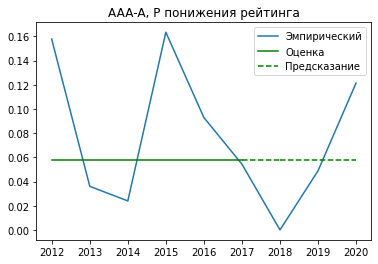

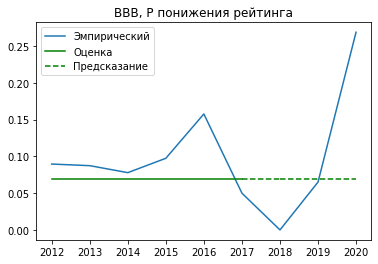

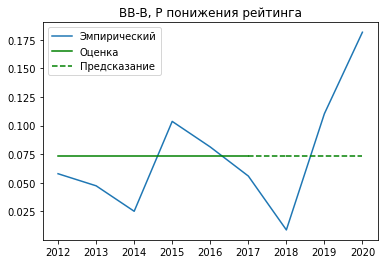

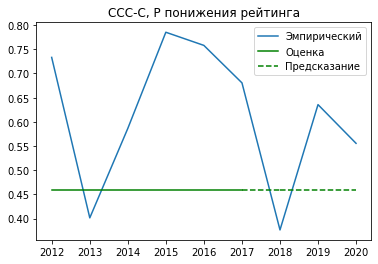

In [107]:
downgrades = np.array(downgrades)
downgrades_mean = np.array(downgrades_mean)
downgrades_hat = np.array(downgrades_hat)
downgrades_hat_test = np.array(downgrades_hat_test)
titles = ["AAA-A, P понижения рейтинга", "BBB, P понижения рейтинга", "BB-B, P понижения рейтинга", "CCC-C, P понижения рейтинга"]
for i in range(4):
    plt.title(titles[i])
    plt.plot(years[12:], downgrades[12:, i], label = "Эмпирический")
    plt.plot(years[12:-3], downgrades_hat[:, i], label = "Оценка", color = "green")
    plt.plot(years[-3:], downgrades_hat_test[:, i], linestyle = "dashed", color = "green", label = "Предсказание")
    plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [downgrades_hat[-1, i], downgrades_hat_test[0, i]], linestyle = "dashed",
             color = "green")
    plt.legend()
    plt.show()

In [108]:
hat_norms = []
downgrades_hat = []
upgrades_hat = []
for year in scores["Year"]:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = matrices[year.year - 1]
    hat_norms.append(la.norm(pmatrix_hat))
    downgrades_hat.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat[year.year] = pmatrix_hat

In [109]:
hat_norms_test = []
downgrades_hat_test = []
upgrades_hat_test = []
mae = 0
for year in CDS_test.index:
    pmatrix_true = matrices[year.year]
    pmatrix_hat = matrices[year.year - 1]
    mae += np.abs(pmatrix_true - pmatrix_hat).mean()
    hat_norms_test.append(la.norm(pmatrix_hat))
    downgrades_hat_test.append(np.triu(pmatrix_hat, k = 1).sum(axis = 1))
    upgrades_hat_test.append(np.tril(pmatrix_hat, k = -1).sum(axis = 1))
    pmatrices_hat_cds[year.year] = pmatrix_hat
mae / 3

0.044024876032328776

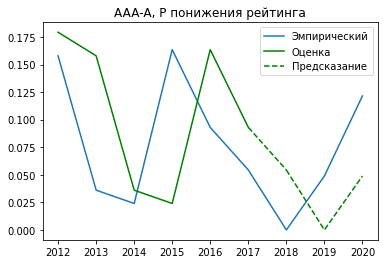

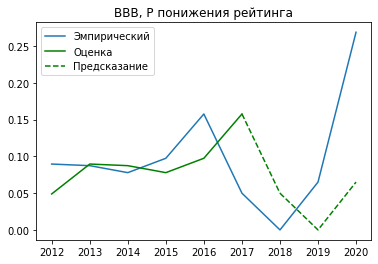

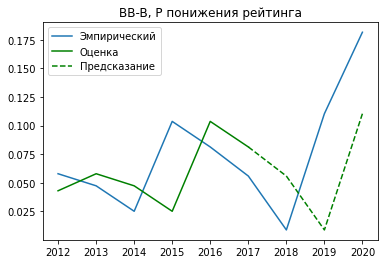

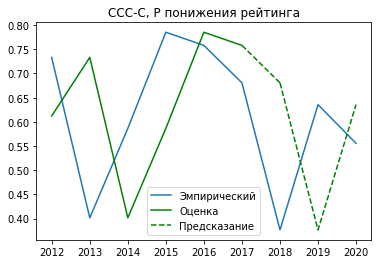

In [110]:
downgrades = np.array(downgrades)
downgrades_mean = np.array(downgrades_mean)
downgrades_hat = np.array(downgrades_hat)
downgrades_hat_test = np.array(downgrades_hat_test)
titles = ["AAA-A, P понижения рейтинга", "BBB, P понижения рейтинга", "BB-B, P понижения рейтинга", "CCC-C, P понижения рейтинга"]
for i in range(4):
    plt.title(titles[i])
    plt.plot(years[12:], downgrades[12:, i], label = "Эмпирический")
    plt.plot(years[12:-3], downgrades_hat[:, i], label = "Оценка", color = "green")
    plt.plot(years[-3:], downgrades_hat_test[:, i], linestyle = "dashed", color = "green", label = "Предсказание")
    plt.plot([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)], [downgrades_hat[-1, i], downgrades_hat_test[0, i]], linestyle = "dashed",
             color = "green")
    plt.legend()
    plt.show()

# Генерация переходов

In [111]:
s_and_p

,Company Name,Date,Curr Rtg,Industry Type,years,Year,GDP
0,Kansas Gas & Electric Co,2000-01-03,2,Electricity Networks,0.000000,2000,0.064351
1,Kansas Gas & Electric Co,2000-03-29,3,Electricity Networks,0.235460,2000,0.064351
2,Kansas Gas & Electric Co,2000-05-19,3,Electricity Networks,0.375093,2000,0.064351
3,Kansas Gas & Electric Co,2000-11-09,3,Electricity Networks,0.851489,2000,0.064351
4,Kansas Gas & Electric Co,2001-07-25,3,Electricity Networks,1.557869,2001,0.032287
...,...,...,...,...,...,...,...
40063,Varex Imaging Corp,2020-10-02,3,Medical Equipment Manufacturing,0.000000,2020,-0.022404
40064,Vistra Corp,2020-10-02,3,Fossil Electric - Unregulated,0.000000,2020,-0.022404
40066,BRP Group Inc,2020-10-01,3,Insurance Brokers & Services,0.000000,2020,-0.022404
40067,Chinos Intermediate 2 LLC,2020-10-01,3,Specialty Apparel Stores,0.000000,2020,-0.022404


In [112]:
industries = s_and_p[["Company Name", "Industry Type"]].drop_duplicates().groupby("Industry Type").count().sort_values("Company Name", ascending = False)[:25].index

<AxesSubplot:>

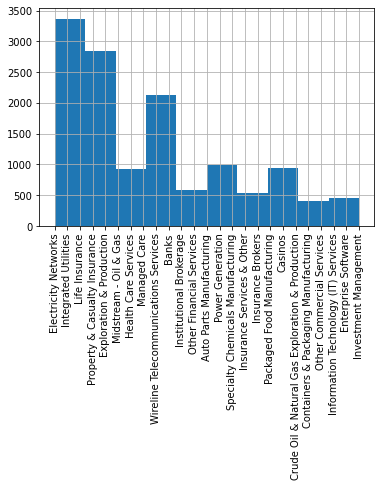

In [113]:
s_and_p[s_and_p["Industry Type"].isin(industries)]["Industry Type"].hist(xrot = 90)

<AxesSubplot:>

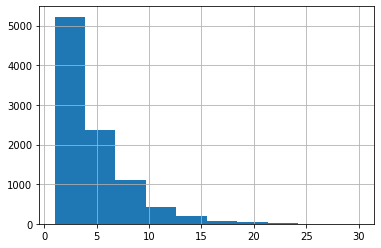

In [114]:
s_and_p.groupby("Company Name").count()["Date"].hist()

In [115]:
last_rtgs = s_and_p.groupby("Company Name").tail(1)[["Company Name", "Curr Rtg", "Year"]]

In [116]:
last_rtgs = last_rtgs.reset_index().drop(columns = ["index"])

In [117]:
last_rtgs["Curr Rtg"] = last_rtgs["Curr Rtg"] - 1

In [118]:
# Remove defaults
last_rtgs = last_rtgs[last_rtgs["Curr Rtg"] != 4]

In [119]:
import numpy as np
import random
def transition(transition_probabilities, rating):
    intervals = np.cumsum(transition_probabilities[rating, :])
    eps = random.uniform(0, 1)
    if eps < intervals[0]:
        return 0
    if eps >= intervals[0] and eps < intervals[1]:
        return 1
    if eps >= intervals[1] and eps < intervals[2]:
        return 2
    if eps >= intervals[2] and eps < intervals[3]:
        return 3
    if eps >= intervals[3]:
        return 4

In [120]:
last_rtgs.loc[last_rtgs["Curr Rtg"] == 0, "Amount"] = 1500
last_rtgs.loc[last_rtgs["Curr Rtg"] == 1, "Amount"] = 1000
last_rtgs.loc[last_rtgs["Curr Rtg"] == 2, "Amount"] = 750
last_rtgs.loc[last_rtgs["Curr Rtg"] == 3, "Amount"] = 500

In [121]:
last_rtgs_2008 = last_rtgs[last_rtgs["Year"].dt.year <= 2008]
last_rtgs_2007 = last_rtgs[last_rtgs["Year"].dt.year <= 2007]

In [122]:
prob_2008 = matrices[2008]

number_of_defaults_2008 = []
for i in tqdm(range(1000)):
    last_rtgs_2008["Next Rtg"] = last_rtgs_2008["Curr Rtg"].apply(lambda x: transition(prob_2008, x))
    number_of_defaults_2008.append(len(last_rtgs_2008[last_rtgs_2008["Next Rtg"] == 4]))

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/1416730703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_rtgs_2008["Next Rtg"] = last_rtgs_2008["Curr Rtg"].apply(lambda x: transition(prob_2008, x))


In [123]:
prob_2007 = matrices[2007]

number_of_defaults_2007 = []
for i in tqdm(range(1000)):
    last_rtgs_2007["Next Rtg"] = last_rtgs_2007["Curr Rtg"].apply(lambda x: transition(prob_2007, x))
    number_of_defaults_2007.append(len(last_rtgs_2007[last_rtgs_2007["Next Rtg"] == 4]))

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/266863846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_rtgs_2007["Next Rtg"] = last_rtgs_2007["Curr Rtg"].apply(lambda x: transition(prob_2007, x))


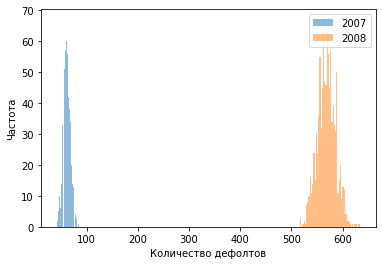

In [124]:
import matplotlib.pyplot as plt
plt.hist(number_of_defaults_2007, 50, alpha=0.5, label='2007')
plt.hist(number_of_defaults_2008, 50, alpha=0.5, label='2008')
plt.xlabel("Количество дефолтов")
plt.ylabel("Частота")
plt.legend(loc='upper right')
plt.show()

In [125]:
from scipy.stats import ttest_ind
ttest_ind(number_of_defaults_2007, number_of_defaults_2008, equal_var = False)

Ttest_indResult(statistic=-847.2290196599631, pvalue=0.0)

In [126]:
investing = last_rtgs[last_rtgs["Curr Rtg"] < 2] 

In [127]:
print("Portfolio Amount:", last_rtgs["Amount"].sum())
print("Portfolio Size:", len(last_rtgs))

Portfolio Amount: 7945000.0
Portfolio Size: 8183


In [128]:
prob_true_2020 = matrices[2020]
number_of_defaults_true_2020 = []
amount_defaulted_true_2020 = []
for i in tqdm(range(1000)):
    last_rtgs["Next Rtg"] = last_rtgs["Curr Rtg"].apply(lambda x: transition(prob_true_2020, x))
    number_of_defaults_true_2020.append(len(last_rtgs[last_rtgs["Next Rtg"] == 4]))
    amount_defaulted_true_2020.append(last_rtgs[last_rtgs["Next Rtg"] == 4]["Amount"].sum())

  0%|          | 0/1000 [00:00<?, ?it/s]

In [129]:
prob_cds_2020  = pmatrices_hat_cds[2020]
number_of_defaults_cds_2020 = []
amount_defaulted_cds_2020 = [] 
for i in tqdm(range(1000)):
    last_rtgs["Next Rtg"] = last_rtgs["Curr Rtg"].apply(lambda x: transition(prob_cds_2020, x))
    number_of_defaults_cds_2020.append(len(last_rtgs[last_rtgs["Next Rtg"] == 4]))
    amount_defaulted_cds_2020.append(last_rtgs[last_rtgs["Next Rtg"] == 4]["Amount"].sum())

  0%|          | 0/1000 [00:00<?, ?it/s]

In [130]:
prob_gdp_2020 = pmatrices_hat[2020]
number_of_defaults_gdp_2020 = []
amount_defaulted_gdp_2020 = []
for i in tqdm(range(1000)):
    last_rtgs["Next Rtg"] = last_rtgs["Curr Rtg"].apply(lambda x: transition(prob_gdp_2020, x))
    number_of_defaults_gdp_2020.append(len(last_rtgs[last_rtgs["Next Rtg"] == 4]))
    amount_defaulted_gdp_2020.append(last_rtgs[last_rtgs["Next Rtg"] == 4]["Amount"].sum())

  0%|          | 0/1000 [00:00<?, ?it/s]

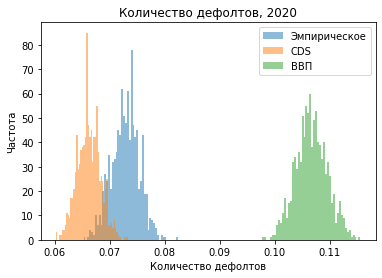

In [131]:
import matplotlib.pyplot as plt
plt.hist(np.array(number_of_defaults_true_2020) / len(last_rtgs), 50, alpha=0.5, label='Эмпирическое')
plt.hist(np.array(number_of_defaults_cds_2020) / len(last_rtgs), 50, alpha=0.5, label='CDS')
plt.hist(np.array(number_of_defaults_gdp_2020) / len(last_rtgs), 50, alpha=0.5, label='ВВП')
plt.legend(loc='upper right')
plt.xlabel("Количество дефолтов")
plt.ylabel("Частота")
plt.title("Количество дефолтов, 2020")
plt.show()

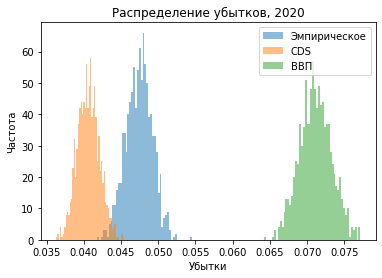

In [132]:
import matplotlib.pyplot as plt
plt.hist(amount_defaulted_true_2020 / last_rtgs["Amount"].sum(), 50, alpha=0.5, label='Эмпирическое')
plt.hist(amount_defaulted_cds_2020 / last_rtgs["Amount"].sum(), 50, alpha=0.5, label='CDS')
plt.hist(amount_defaulted_gdp_2020 / last_rtgs["Amount"].sum(), 50, alpha=0.5, label='ВВП')
plt.legend(loc='upper right')
plt.xlabel("Убытки")
plt.ylabel("Частота")
plt.title("Распределение убытков, 2020")
plt.show()

In [133]:
ttest_ind(amount_defaulted_gdp_2020, amount_defaulted_cds_2020)

Ttest_indResult(statistic=371.8520293806022, pvalue=0.0)

In [134]:
ttest_ind(amount_defaulted_true_2020, amount_defaulted_cds_2020)

Ttest_indResult(statistic=94.39390240555721, pvalue=0.0)

In [135]:
print("True")
print((np.array(amount_defaulted_true_2020)).mean())
print(np.quantile(np.array(amount_defaulted_true_2020), 0.95))
print("CDS")
print(np.array(amount_defaulted_cds_2020).mean())
print(np.quantile(np.array(amount_defaulted_cds_2020), 0.95))
print("GDP")
print(np.array(amount_defaulted_gdp_2020).mean())
print(np.quantile(np.array(amount_defaulted_gdp_2020), 0.95))

True
376996.25
399262.5
CDS
322651.75
342000.0
GDP
564982.25
593512.5


In [136]:
print("True")
print(((np.array(amount_defaulted_true_2020)) / last_rtgs["Amount"].sum()).mean())
print(np.quantile(np.array(amount_defaulted_true_2020), 0.95) / last_rtgs["Amount"].sum())
print("CDS")
print((np.array(amount_defaulted_cds_2020) / last_rtgs["Amount"].sum()).mean())
print(np.quantile(np.array(amount_defaulted_cds_2020), 0.95) / last_rtgs["Amount"].sum())
print("GDP")
print((np.array(amount_defaulted_gdp_2020).mean()) / last_rtgs["Amount"].sum())
print(np.quantile(np.array(amount_defaulted_gdp_2020), 0.95) / last_rtgs["Amount"].sum())

True
0.04745075519194462
0.05025330396475771
CDS
0.04061066708621775
0.04304594084329767
GDP
0.07111167400881058
0.07470264317180617


In [137]:
prob_true_2020 = matrices[2020]
number_of_defaults_true_2020 = []
amount_defaulted_true_2020 = []
for i in tqdm(range(1000)):
    investing["Next Rtg"] = investing["Curr Rtg"].apply(lambda x: transition(prob_true_2020, x))
    number_of_defaults_true_2020.append(len(investing[investing["Next Rtg"] == 4]))
    amount_defaulted_true_2020.append(investing[investing["Next Rtg"] == 4]["Amount"].sum())

prob_gdp_2020 = pmatrices_hat[2020]
number_of_defaults_gdp_2020 = []
amount_defaulted_gdp_2020 = []
for i in tqdm(range(1000)):
    investing["Next Rtg"] = investing["Curr Rtg"].apply(lambda x: transition(prob_gdp_2020, x))
    number_of_defaults_gdp_2020.append(len(investing[investing["Next Rtg"] == 4]))
    amount_defaulted_gdp_2020.append(investing[investing["Next Rtg"] == 4]["Amount"].sum())

prob_cds_2020  = pmatrices_hat_cds[2020]
number_of_defaults_cds_2020 = []
amount_defaulted_cds_2020 = []
for i in tqdm(range(1000)):
    investing["Next Rtg"] = investing["Curr Rtg"].apply(lambda x: transition(prob_cds_2020, x))
    number_of_defaults_cds_2020.append(len(investing[investing["Next Rtg"] == 4]))
    amount_defaulted_cds_2020.append(investing[investing["Next Rtg"] == 4]["Amount"].sum())

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/2334166148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investing["Next Rtg"] = investing["Curr Rtg"].apply(lambda x: transition(prob_true_2020, x))


  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/2334166148.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investing["Next Rtg"] = investing["Curr Rtg"].apply(lambda x: transition(prob_gdp_2020, x))


  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Tatyana\AppData\Local\Temp/ipykernel_11028/2334166148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investing["Next Rtg"] = investing["Curr Rtg"].apply(lambda x: transition(prob_cds_2020, x))


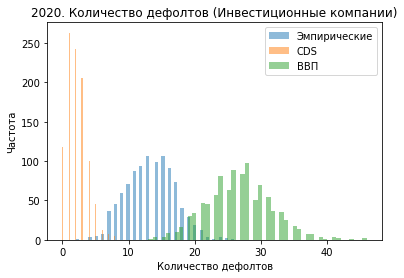

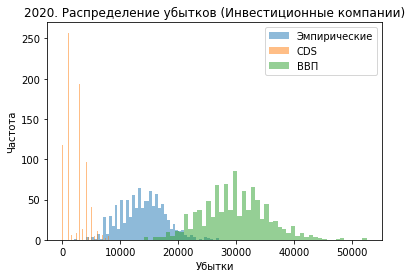

In [138]:
plt.hist(np.array(number_of_defaults_true_2020), 50, alpha=0.5, label='Эмпирические')
plt.hist(np.array(number_of_defaults_cds_2020), 50, alpha=0.5, label='CDS')
plt.hist(np.array(number_of_defaults_gdp_2020), 50, alpha=0.5, label='ВВП')
plt.legend(loc='upper right')
plt.xlabel("Количество дефолтов")
plt.ylabel("Частота")
plt.title("2020. Количество дефолтов (Инвестиционные компании)")
plt.show()

plt.hist(np.array(amount_defaulted_true_2020), 50, alpha=0.5, label='Эмпирические')
plt.hist(np.array(amount_defaulted_cds_2020), 50, alpha=0.5, label='CDS')
plt.hist(np.array(amount_defaulted_gdp_2020), 50, alpha=0.5, label='ВВП')
plt.legend(loc='upper right')
plt.xlabel("Убытки")
plt.ylabel("Частота")
plt.title("2020. Распределение убытков (Инвестиционные компании)")
plt.show()

In [139]:
ttest_ind(amount_defaulted_cds_2020, amount_defaulted_gdp_2020)

Ttest_indResult(statistic=-149.07482001205125, pvalue=0.0)

In [140]:
print("True")
print(np.array(amount_defaulted_true_2020).mean())
print(np.quantile(np.array(amount_defaulted_true_2020), 0.95))
print("CDS")
print(np.array(amount_defaulted_cds_2020).mean())
print(np.quantile(np.array(amount_defaulted_cds_2020), 0.95))
print("GDP")
print(np.array(amount_defaulted_gdp_2020).mean())
print(np.quantile(np.array(amount_defaulted_gdp_2020), 0.95))

True
13631.0
20000.0
CDS
2182.5
5000.0
GDP
29748.5
39500.0


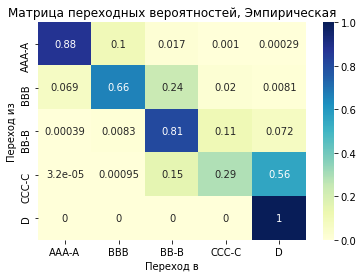

In [141]:
ax = sns.heatmap(prob_true_2020, annot = True, cmap = "YlGnBu",
            xticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"], yticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"])
ax.set(xlabel = "Переход в", ylabel = "Переход из", title = "Матрица переходных вероятностей, Эмпирическая")
plt.show()

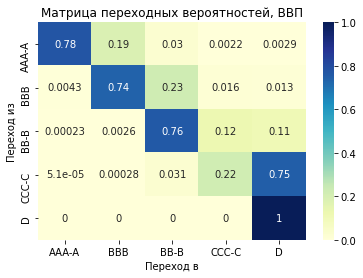

In [142]:
ax = sns.heatmap(prob_gdp_2020, annot = True, cmap = "YlGnBu",
            xticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"], yticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"])
ax.set(xlabel = "Переход в", ylabel = "Переход из", title = "Матрица переходных вероятностей, ВВП")
plt.show()

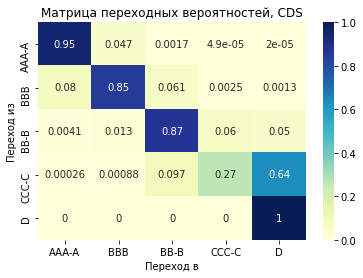

In [143]:
ax = sns.heatmap(prob_cds_2020, annot = True, cmap = "YlGnBu",
            xticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"], yticklabels = ["AAA-A", "BBB", "BB-B", "CCC-C", "D"])
ax.set(xlabel = "Переход в", ylabel = "Переход из", title = "Матрица переходных вероятностей, CDS")
plt.show()

In [144]:
print("Portfolio :", len(investing))
print("Portfolio Amount:", investing["Amount"].sum())

Portfolio : 3635
Portfolio Amount: 4667000.0
